In [81]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pointbiserialr, spearmanr
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, Normalizer
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from uef import ucoef, conditional_entropy, entropy

Column Descriptions:
Administrative: This is the number of pages of this type (administrative) that the user visited.

Administrative_Duration: This is the amount of time spent in this category of pages.

Informational: This is the number of pages of this type (informational) that the user visited.

Informational_Duration: This is the amount of time spent in this category of pages.

ProductRelated: This is the number of pages of this type (product related) that the user visited.

ProductRelated_Duration: This is the amount of time spent in this category of pages.

BounceRates: The percentage of visitors who enter the website through that page and exit without triggering any additional tasks.

ExitRates: The percentage of pageviews on the website that end at that specific page.

PageValues: The average value of the page averaged over the value of the target page and/or the completion of an eCommerce transaction.

SpecialDay: This value represents the closeness of the browsing date to special days or holidays (eg Mother's Day or Valentine's day) in which the transaction is more likely to be finalized. More information about how this value is calculated below.
Month: Contains the month the pageview occurred, in string form.

OperatingSystems: An integer value representing the operating system that the user was on when viewing the page.

Browser: An integer value representing the browser that the user was using to view the page.

Region: An integer value representing which region the user is located in.

TrafficType: An integer value representing what type of traffic the user is categorized into.
Read more about traffic types here.https://www.practicalecommerce.com/Understanding-Traffic-Sources-in-Google-Analytics

VisitorType: A string representing whether a visitor is New Visitor, Returning Visitor, or Other.

Weekend: A boolean representing whether the session is on a weekend.

Revenue: A boolean representing whether or not the user completed the purchase.

In [2]:
#Загружаем данные и информацию о датасете
df = pd.read_csv('online_shoppers_intention.csv')
df.info(), df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

(None, (12330, 18))

Пропущенных значений нет. Целевая переменная - has purchased, всего 17 признаков

In [3]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


In [5]:
#Разделим на численные и категориальные признаки 
numerical = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']
categorical = ['Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType']
target = ['Revenue']

In [6]:
#Сильный дисбаланс классов
df.Revenue.value_counts()

Revenue
False    10422
True      1908
Name: count, dtype: int64

In [29]:
#Подготовка данных
df.replace({False: 0, True: 1}, inplace=True)
encoder = LabelEncoder()
for d in df.select_dtypes(include=['object']):
    df[d] = encoder.fit_transform(df[d])

Проверим распределение численных параметров

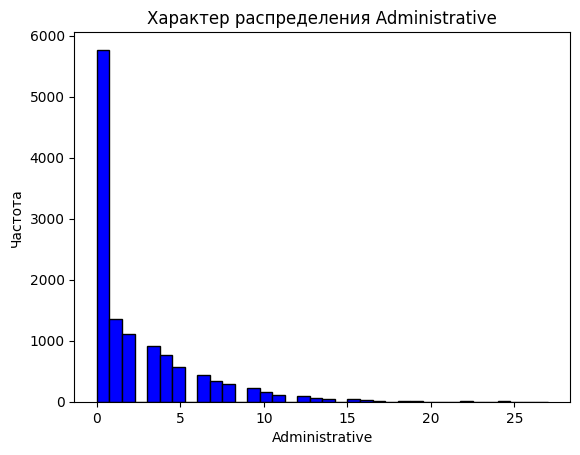

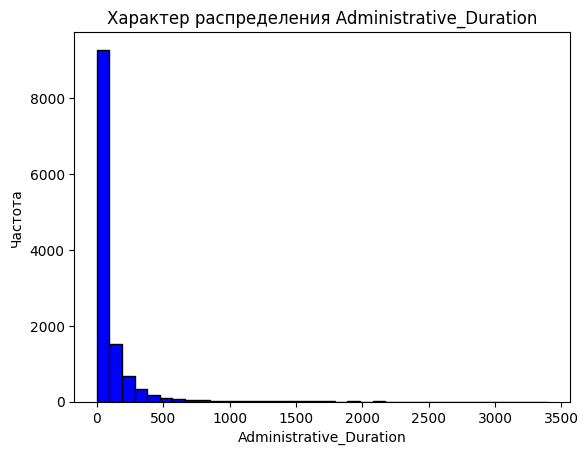

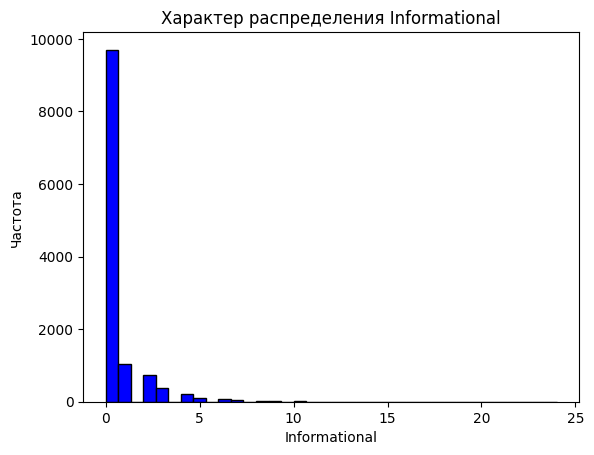

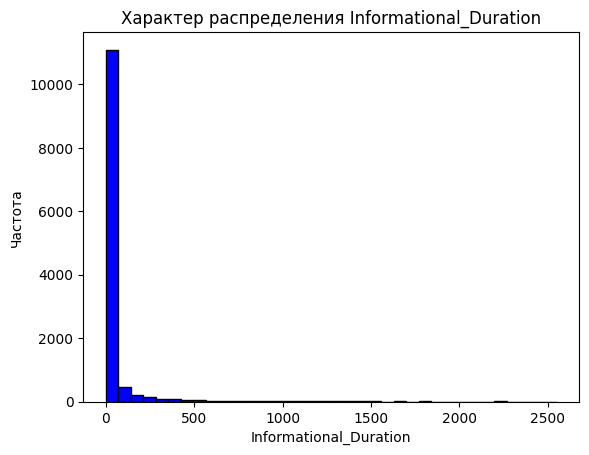

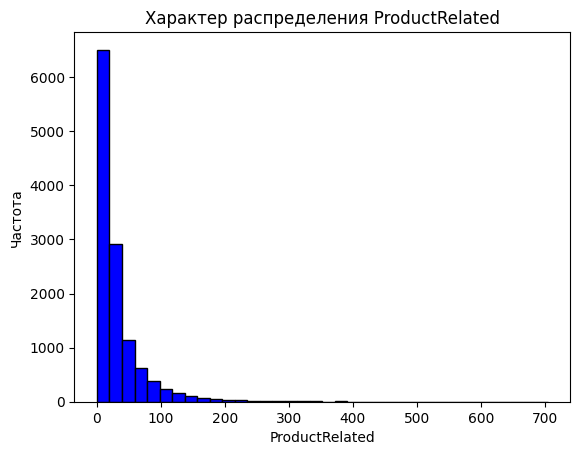

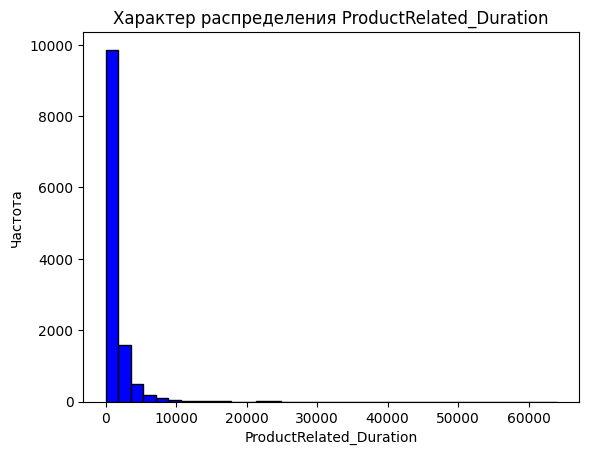

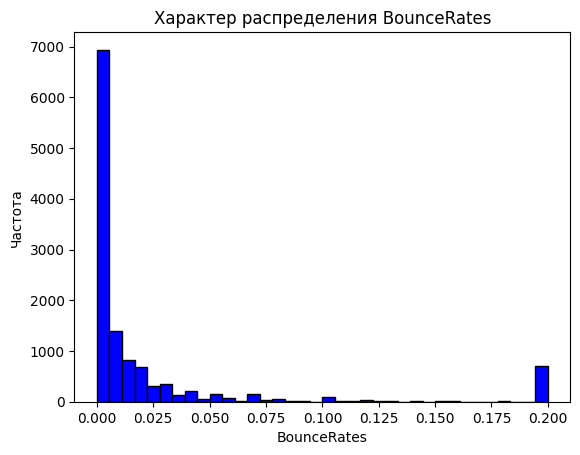

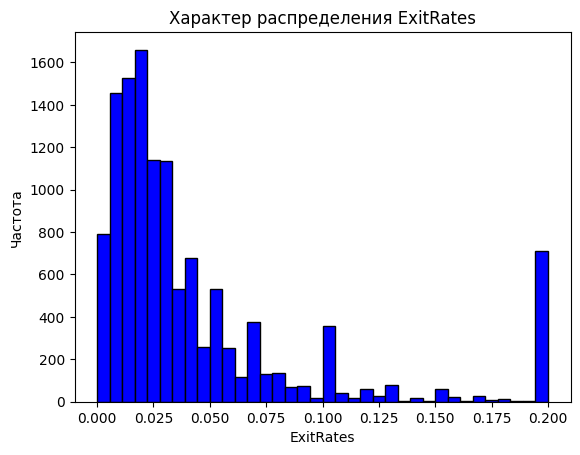

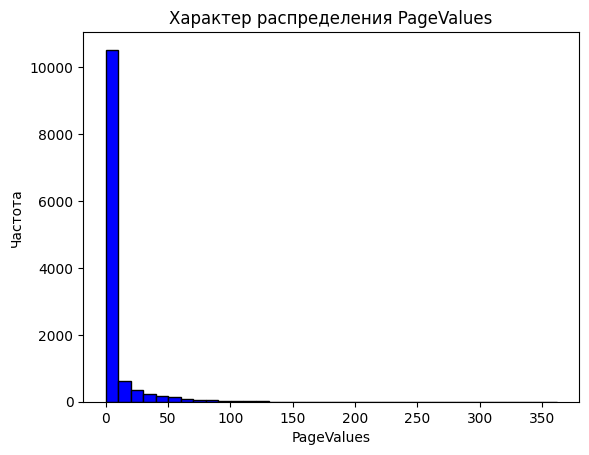

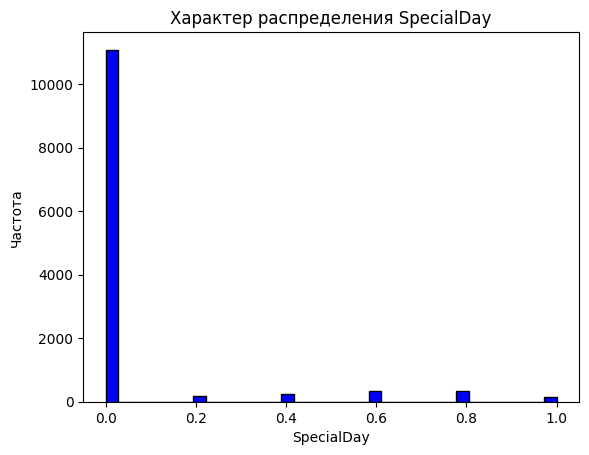

In [11]:
for n in numerical:
    plt.hist(df[n], color = 'blue', edgecolor = 'black',
         bins = int(180/5))
    plt.xlabel(f'{n}')
    plt.ylabel('Частота')
    plt.title(f'Характер распределения {n}')
    plt.show()
    

Распределение не нормальное - проводим нормализацию. Применим l2-норму, так как она компонуется со всеми алгоритмами машинного обучения.

In [12]:
norm = Normalizer(norm='l2')
df[numerical] = norm.fit_transform(df[numerical])

In [13]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,0.004996,0.100965,0.001004,0.025284,0.093005,0.900507,0.009825,0.010234,0.008522,0.002773,2.124006,2.357097,3.147364,4.069586,0.232603,0.154745
std,0.030248,0.196018,0.018254,0.098796,0.217046,0.257445,0.042664,0.042925,0.041631,0.033105,0.911325,1.717277,2.401591,4.025169,0.422509,0.361676
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.021092,0.975643,0.000000,0.000010,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000
50%,0.000551,0.006248,0.000000,0.000000,0.032766,0.997143,0.000001,0.000034,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000
75%,0.003781,0.099743,0.000000,0.000000,0.052559,0.999336,0.000021,0.000174,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000,0.000000
max,0.990148,0.999984,0.962250,0.999634,0.999185,1.000000,0.707107,0.710651,0.950450,0.693375,8.000000,13.000000,9.000000,20.000000,1.000000,1.000000


Взаимосвязь переменных

Для количественных применим точечно-биссериальную корреляцию (так как целевая переменная дихотомическая)

In [14]:
from scipy import stats

columns, correlations = [], []

for col in numerical:
    columns.append(col)
    correlations.append(stats.pointbiserialr(df[col], df['Revenue'])[0])

num_corr = pd.DataFrame({'column': columns, 'correlation': correlations})

num_corr.style.background_gradient()

,column,correlation
0,Administrative,-0.005513
1,Administrative_Duration,0.018765
2,Informational,-0.010153
3,Informational_Duration,0.025782
4,ProductRelated,-0.121345
5,ProductRelated_Duration,0.089184
6,BounceRates,-0.096330
7,ExitRates,-0.099321
8,PageValues,0.365212
9,SpecialDay,-0.035452


Визуализация

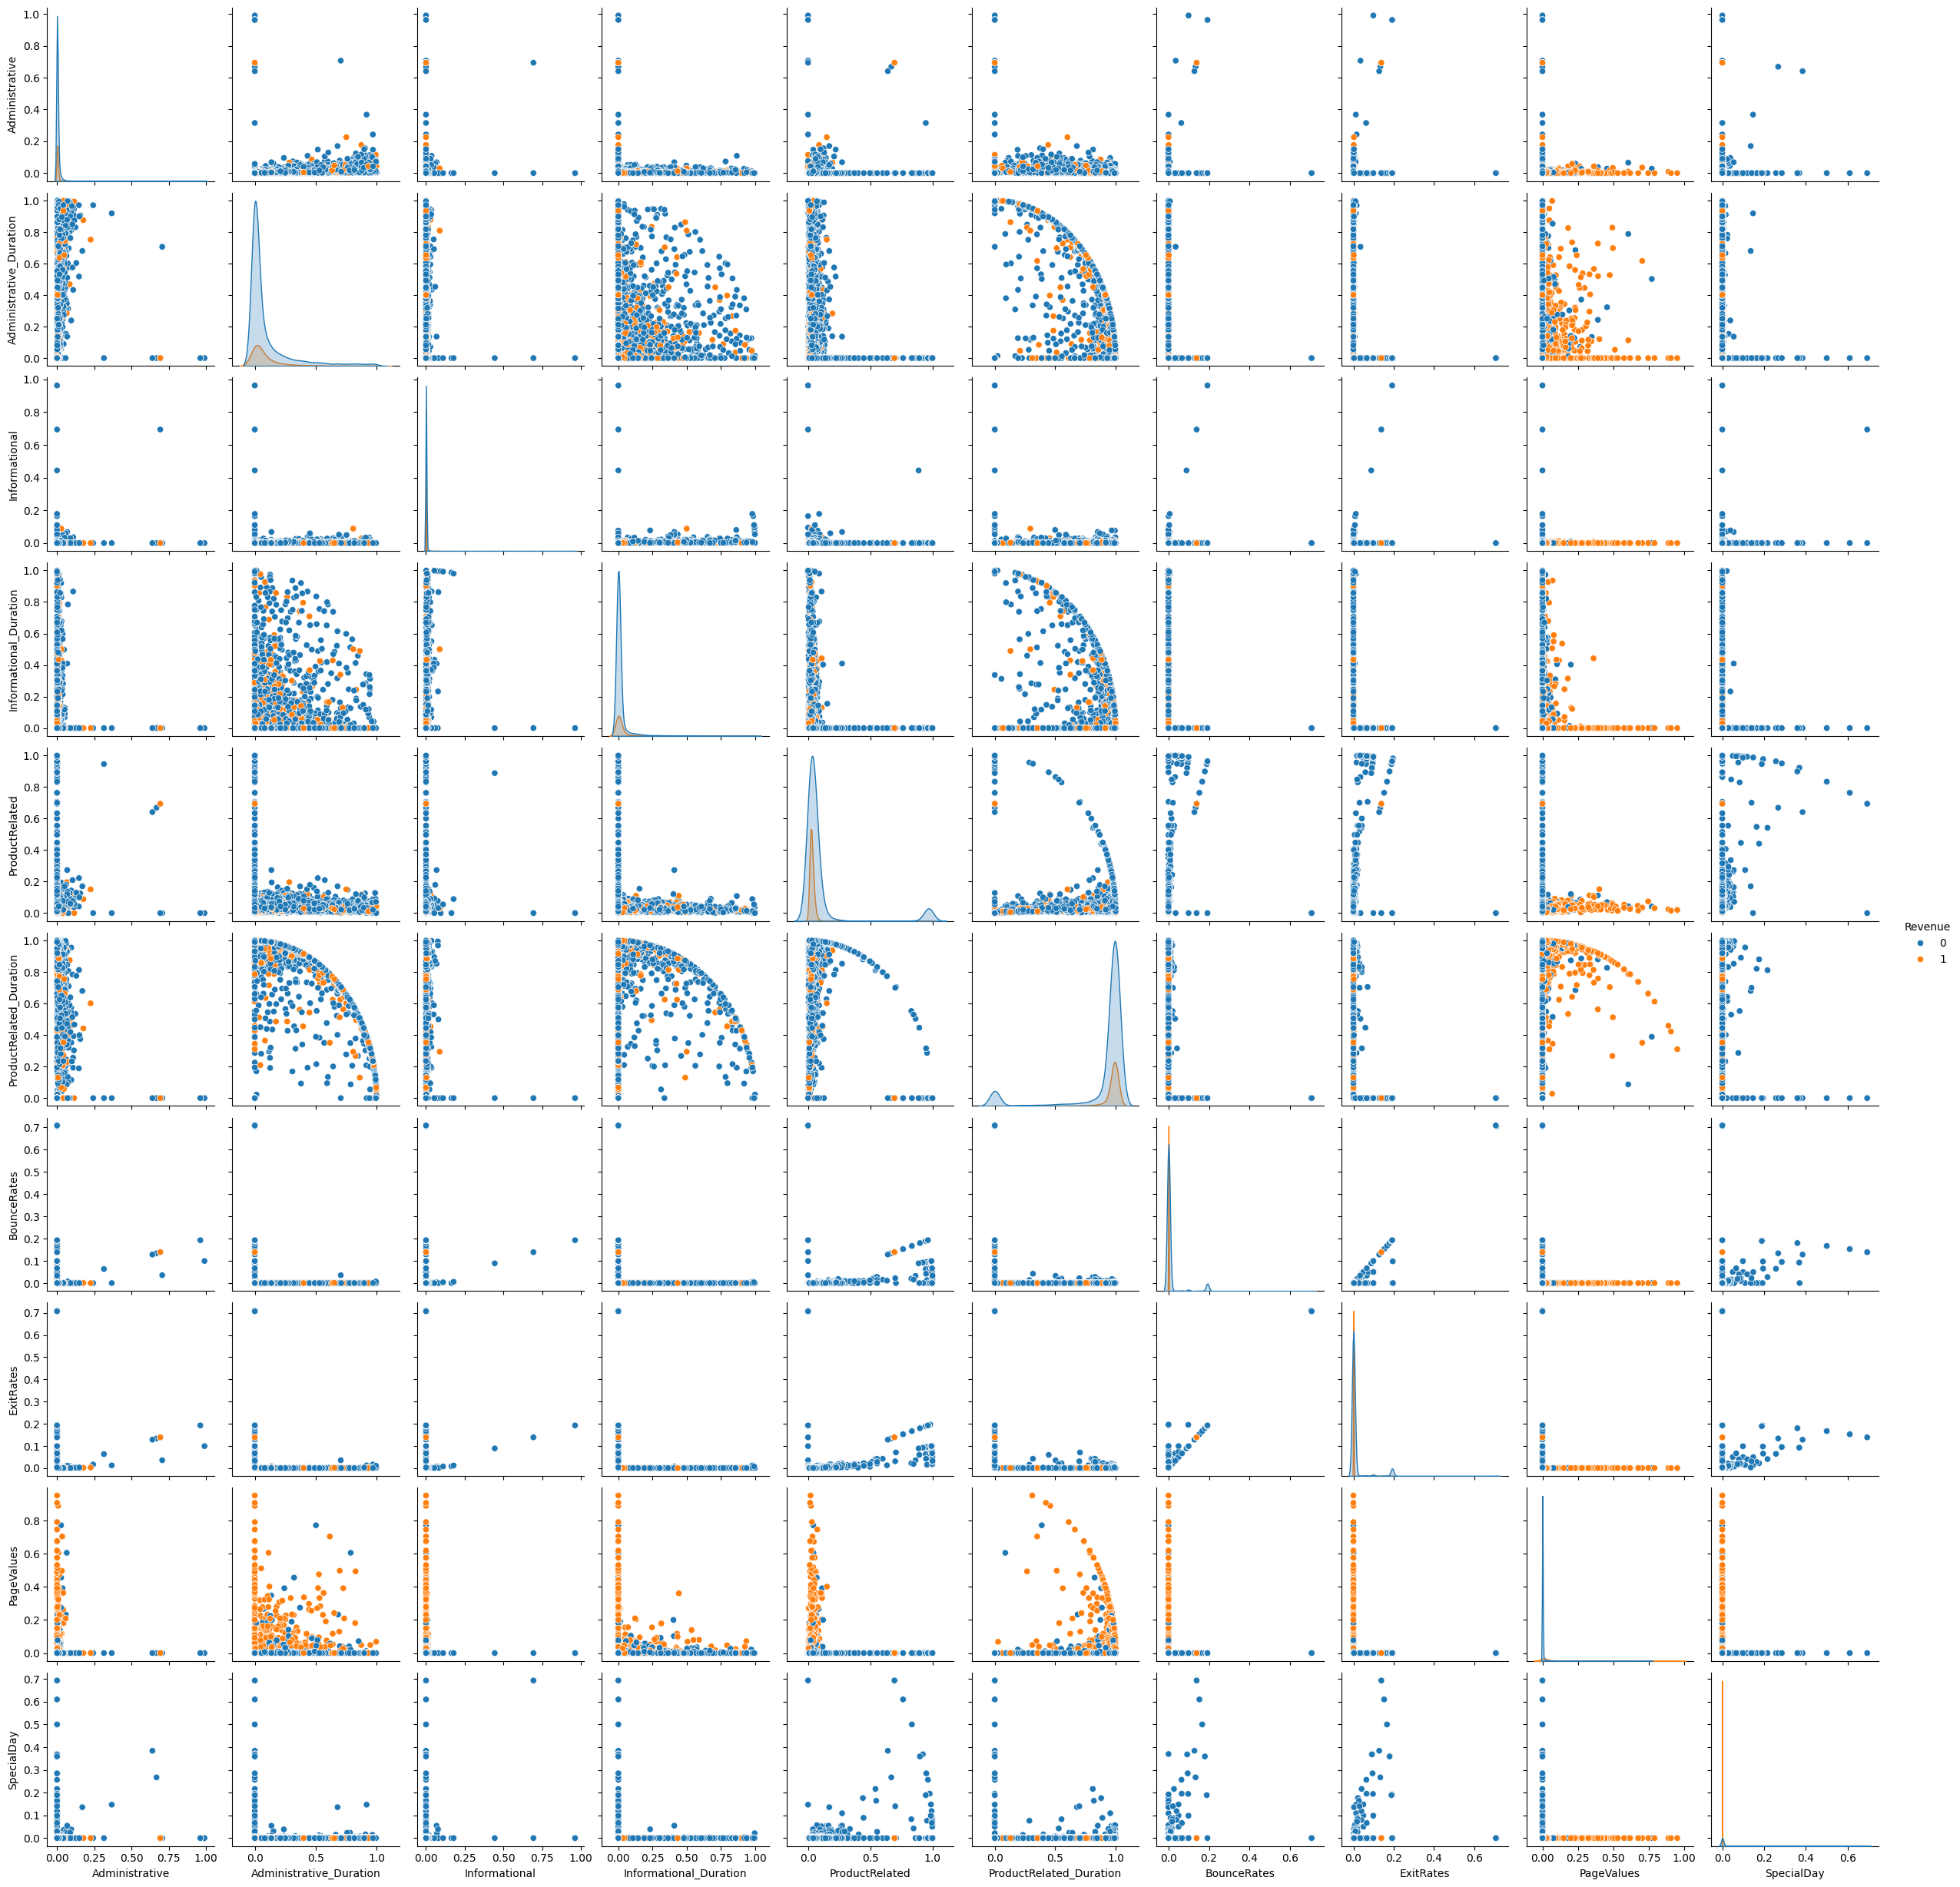

In [16]:
visual_num = df[numerical+target]
sns.pairplot(data = visual_num, hue = 'Revenue')

Для расчет корреляции категориальных признаков, произведен расчет неопределенности

In [13]:
columns, correlations = [], []

for col in categorical:
    columns.append(col)
    correlations.append(ucoef(df[col], df['Revenue']))

pd.DataFrame({'column': columns, 'correlation': correlations}).style.background_gradient()

,column,correlation
0,Month,0.823198
1,OperatingSystems,0.372699
2,Browser,0.140499
3,Region,0.700764
4,TrafficType,0.419026
5,VisitorType,-0.680171


Визуализация

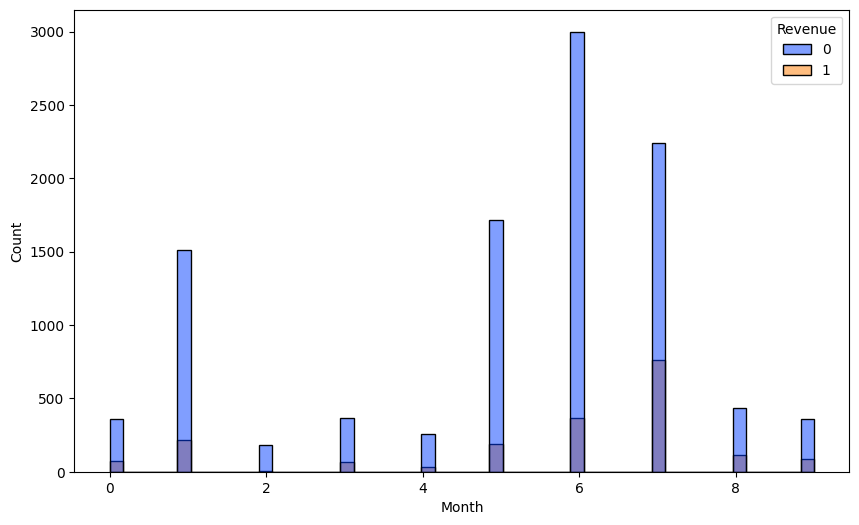

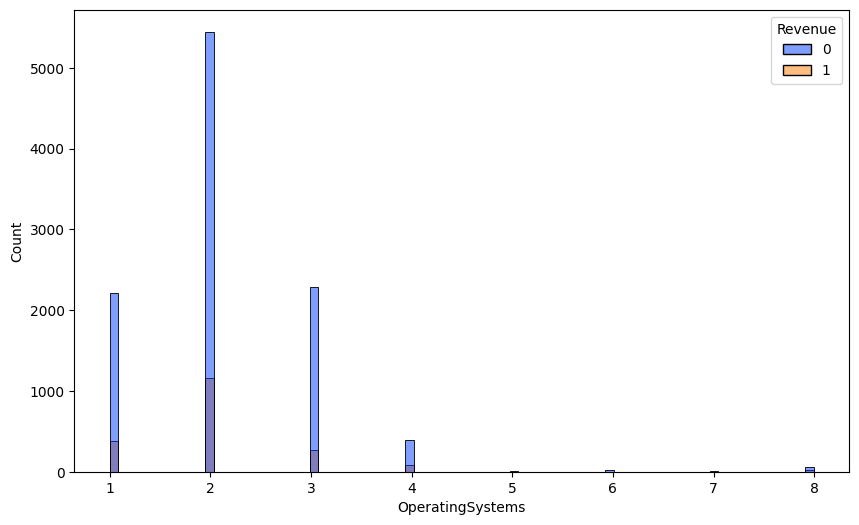

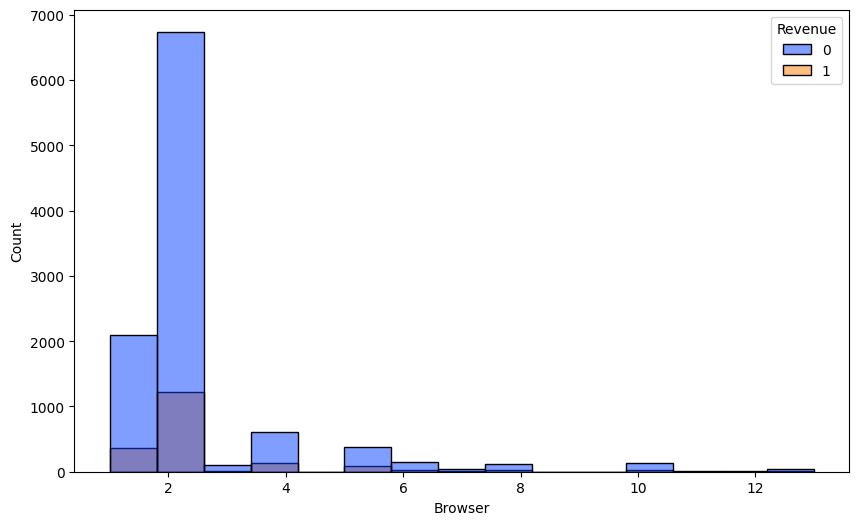

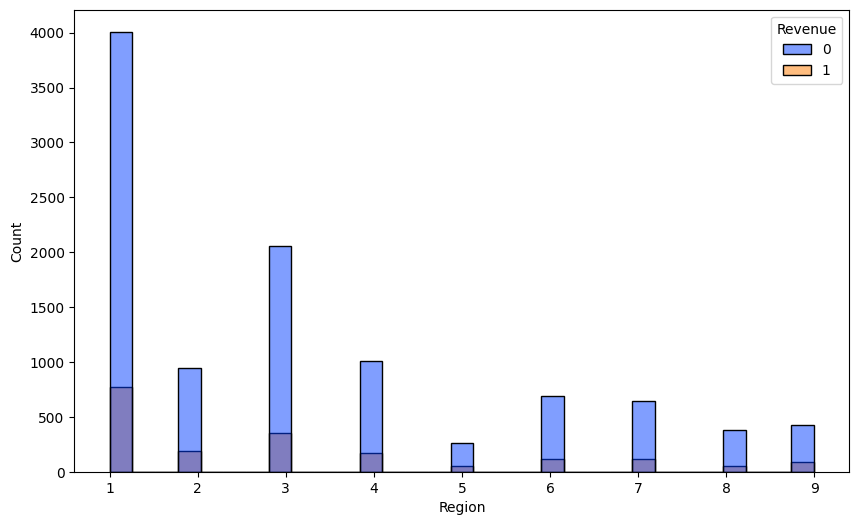

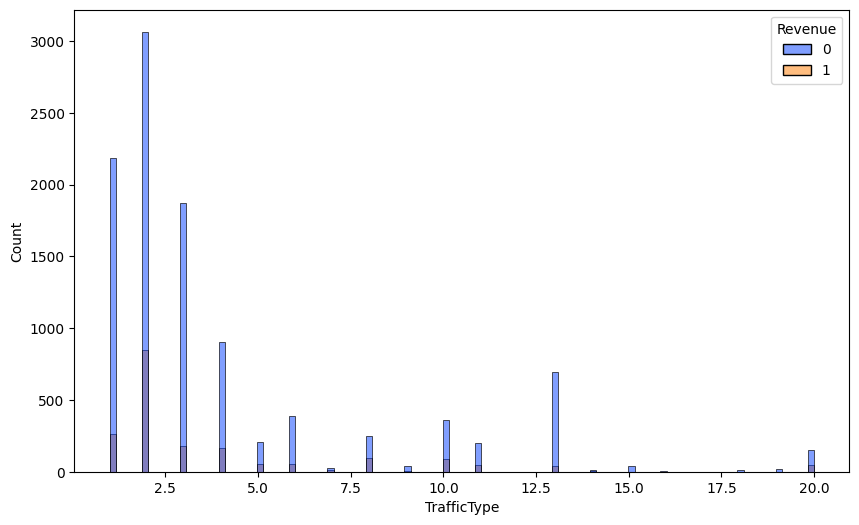

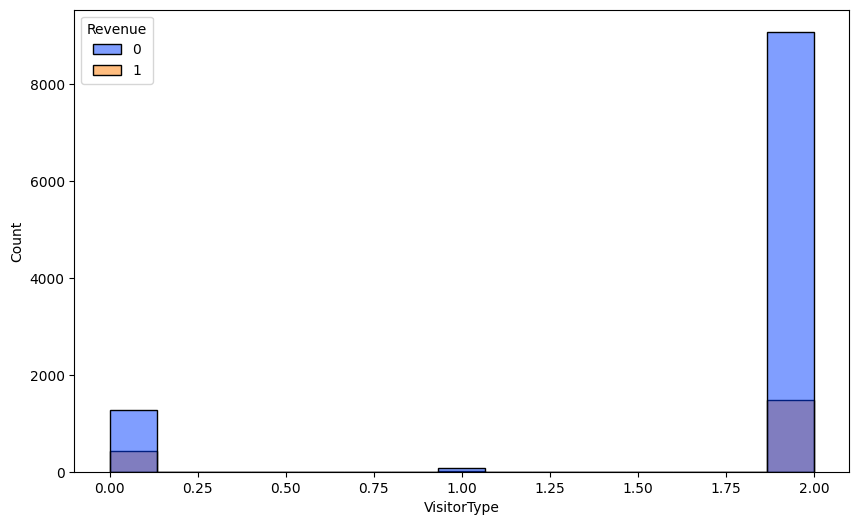

In [32]:
for c in categorical:
    plt.figure(figsize=(10,6))
    sns.histplot(data=df, x = df[c], hue=df['Revenue'], palette='bright')

In [ ]:
df[categorical]

Ada Boost

In [38]:
x_train, x_test, y_train, y_test = train_test_split(df[numerical+categorical], df[target], test_size=0.3, random_state=42)

In [77]:
param_grid = {'n_estimators': [100, 200, 300],
              'learning_rate': [0.1, 0.01, 0.001]}
ada_classifier = AdaBoostClassifier()
ada_cv = GridSearchCV(ada_classifier, param_grid, cv= 5, n_jobs=-1, refit = True)
ada_cv.fit(x_train, y_train)
print(ada_cv.best_params_)

y_pred_ada = ada_cv.predict(x_test)
print('Classification Report:')
print(classification_report(y_test, y_pred_ada))
print(confusion_matrix(y_test, y_pred_ada))

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


{'learning_rate': 0.1, 'n_estimators': 200}
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      3124
           1       0.70      0.56      0.62       575

    accuracy                           0.89      3699
   macro avg       0.81      0.76      0.78      3699
weighted avg       0.89      0.89      0.89      3699

[[2989  135]
 [ 255  320]]


Extra Tree Classifier

In [82]:
param_grid = {'n_estimators': [200,250,300,350],
              'min_samples_split': [10,12,15]}
extra_trees_classifier = ExtraTreesClassifier()
extra_tree_cv = GridSearchCV(extra_trees_classifier, param_grid, cv= 5, n_jobs=-1, refit=True)
extra_tree_cv.fit(x_train, y_train)
print(extra_tree_cv.best_params_)

y_pred_extr = extra_tree_cv.predict(x_test)
print('Classification Report:')
print(classification_report(y_test, y_pred_extr))
print(confusion_matrix(y_test, y_pred_extr))

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


{'min_samples_split': 10, 'n_estimators': 200}
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      3124
           1       0.76      0.47      0.58       575

    accuracy                           0.89      3699
   macro avg       0.83      0.72      0.76      3699
weighted avg       0.89      0.89      0.88      3699

[[3037   87]
 [ 304  271]]


SVC

In [75]:
svm = SVC() 
param_grid_svc = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf']}  
  
grid_csv = GridSearchCV(svm, param_grid_svc, refit = True, verbose = 3) 
  
 
grid_csv.fit(x_train, y_train.values.ravel()) 
print(grid_csv.best_params_) 

y_pred_csv = grid_csv.predict(x_test) 
print('Classification Report:')
print(classification_report(y_test, y_pred_csv))
print(confusion_matrix(y_test, y_pred_csv))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.845 total time=   1.7s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.846 total time=   1.8s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.846 total time=   1.7s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.845 total time=   1.6s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.845 total time=   1.7s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.845 total time=   1.3s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.846 total time=   1.3s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.846 total time=   1.3s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.845 total time=   1.4s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.845 total time=   1.3s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.845 total time=   2.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

KNeighborsClassifier

In [80]:
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, grid_params, verbose = 1, cv=3, n_jobs = -1, refit = True)

grid_knn.fit(x_train, y_train)
print(grid_knn.best_params_)

y_pred_knn = grid_knn.predict(x_test)
print('Classification Report:')
print(classification_report(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))

Fitting 3 folds for each of 36 candidates, totalling 108 fits


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


{'metric': 'minkowski', 'n_neighbors': 11, 'weights': 'uniform'}
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.99      0.91      3124
           1       0.46      0.05      0.09       575

    accuracy                           0.84      3699
   macro avg       0.65      0.52      0.50      3699
weighted avg       0.79      0.84      0.79      3699

[[3091   33]
 [ 547   28]]


Gradient Boosting

In [83]:
grad_boost = GradientBoostingClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
param_grid = {'n_estimators': [200,250,300,350],
              'learning_rate': [0.1,0.01,0.005,0.001]}
grad_boost_cv = GridSearchCV(grad_boost, param_grid, cv= 5, n_jobs=-1, refit=True)
grad_boost_cv.fit(x_train, y_train)
print(grad_boost_cv.best_params_)

y_pred_grad = grad_boost_cv.predict(x_test)
print('Classification Report:')
print(classification_report(y_test, y_pred_grad))
print(confusion_matrix(y_test, y_pred_grad))

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'learning_rate': 0.01, 'n_estimators': 350}
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      3124
           1       0.73      0.57      0.64       575

    accuracy                           0.90      3699
   macro avg       0.83      0.77      0.79      3699
weighted avg       0.89      0.90      0.90      3699

[[3002  122]
 [ 247  328]]
